# Monopolist's Optimization Problem

## Introduction

Bob runs a widget factory. He is the sole producer of his particular type of widget.
The price, $p$, he receives in the market for a pound of his widgets is determined the quantity, $q$, of pounds of widgets he puts on the market.

He faces the quadratic demand curve $p(q) = 100 - q^{2}$.

Which means, for example:

* if he sells 1 pound of widget he receives \\$99 per pound: $p(1) = 100 - 1^{2} = 99$
* if he sells 2 pounds of widgets he receives \\$96 per pound: $p(1) = 100 - 2^{2} = 96$
* if he sells 3 pounds of widgets he receives \\$91 per pound: $p(1) = 100 - 3^{2} = 91$

Bob owns the factory and equipment in it; he cannot sell it. His cost per pound of widgets is 10. This gives $C(q)=10q$ as his total costs.

Profit is given by $price\ per\ unit * units\ sold - total\ costs$. In our notation, Bob's profit, $\pi$ can be written as $\pi(q) = 90q - q^{3}$.

## Optimization Techniques

We'll consider minimizing a function that is concave over its relevant range. In order to maximize a convex function, we can simply take its negatitive (which is concave) and minimize it.

For simplicity, we'll only consider function of one real-valued variable.

### Gradient Descent

Gradient Descent is a simple method of finding a minimum that can be used on a very wide variety of functions. Gradient Descent along with methods based on it is commonly used to maximize functions that have no second derivative or where the second derivative of the function is difficult to compute or even approximate. Gradient Descent based methods are used in order to minimize the loss function in many machine learning models, particularly deep learning models. 

The idea is that once we pick an initial guess, we iteratively can follow the slope (i.e. go the opposite direction of the slope) until we reach a minimum. This is often compared to a ball rolling down a hill, but without the details to make it physically realistic. (There are other optimization techniques that draw inspiration for the physical metaphor by adding in analogues to friction and gravity.)

The iterative equation for Gradient Descent, for a real-valued function of one variable, is given by:
$$x_{n+1} = x_{n} - \gamma \ f'(x_{n})$$
Where $\gamma$, called the learning rate, controls the rate at which descent happens. The learning rate is an example of a hyperparameter. A hyperparameter what is not estimated by the model and much be chosen before the model is run. In cases where the function is very steep, a low value should be chosen for the learning rate. Conversely, a high value for the learning rate should be chosen for very gradual functions.

### Newton-Raphson

Newton-Raphson is a root finding algorithm. However, since finding a critical point of a function (minima, maxima, point of inflection) is equivalent to finding a root of it derivative, we can use Newton-Raphson for minimization. To use Newton-Raphson for minimization, we require that the function has a second derivative over its domain. Newton-Raphson and methods based on it are commonly used for scientific and statistical applications, because in cases where the function is well understood, Newton-Raphson has better properties and converges more rapidly than gradient descent.

For a real-valued function of one variable, $f$, Newton-Raphson find roots with the iterative equation:
$$x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$$

Since, minimizing a well-behaved function is the same as finding the roots of its derivative, we can use Newton-Raphson to minimize f with the iterative equation:
$$x_{n+1} = x_{n} - \frac{f'(x_{n})}{f''(x_{n})}$$

Rewriting slightly, we get:  
$$x_{n+1} = x_{n} - \gamma(x_{n}){f'(x_{n})}$$
where $\gamma(x_{n}) = \frac{1}{f''(x_{n})}$.

From this last equation, we can directly see the relationship to Gradient Descent: Newton-Raphson minimization is like Gradient Descent, but with a learning rate that is determined by the curvature of the function. Returning to the metaphor of a ball rolling down a hill, Gradient Descent has a constant acceleration, while Newton-Raphson minimization has acceleration determined by the curvature of the hill.

Another important difference is that Newton-Raphson has no hyperparameters. Which contributes to the simplicity of using the method.

## Instructions

1. Show the expression for profit, $\pi(q) = 90q - q^{3}$, is correct.
2. Mathematically solve for the optimal quantity of widgets Bob should produce to maximize his profit and his maximum profit.  
(If you need a refresher, see: https://mjo.osborne.economics.utoronto.ca/index.php/tutorial/index/1/nen/t)
3. Use Gradient Descent to numerically solve Bob's problem. Write the algorithm yourself; don't use a package for it!
4. Use Newton-Raphson to numerically solve Bob's problem. Write the algorithm yourself; don't use a package for it!
4. Compare the convergence speed of Gradient Descent and Newton's method.
5. Use Scipy's building optimization function to solve Bob's problem.

## Solutions

## Setup

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import warnings

### Part 1

Profits are given by $price\ per\ unit * units\ sold - total\ costs$.  
So:  
$
\quad \pi(q) = p(q) q - C(q)\\
\quad \pi(q) = (100 - q^{2}) q - 10q\\
\quad \pi(q) = 90q - q^{3}\\
$

### Part 2

Profits are given by $\pi(q) = 90q - q^{3}$.  
The derivative is $\pi'(q) = 90 - 3q^{2}$, by the power rule.  
We know that a critical point occurs at $\pi'(q) = 0$.  
Plugging in the expression for $\pi'(q)$ , we get $90 - 3q^{2} = 0$.  
Solving, we get $q = \sqrt{30}$ and $q = -\sqrt{30}$.  
However, the range of q is implicitly nonnegative numbers, so the negative root doesn't make sense.  
So, the optimal quantity is $q = \sqrt{30}$ and the associated profit is quantity is $pi(\sqrt{30}) = 60\sqrt{30}$.


We need to verify that we have the global maximum (as opposed to a local maxima or a minama).  
We can get the intuition for this by graphing.

We find the roots of $\pi(q)$, so that we can get a reasonable range.  
The roots occur at $\pi(q) = 0$.  
The relevant roots are $q=0$ and $q=\sqrt{30}$.


In [2]:
def pi(q):
    """Profit as a function of quantity."""
    return 90 * q - q ** 3

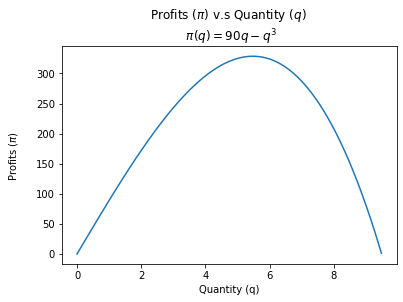

In [3]:
x = np.arange(0, 3 * np.sqrt(10), 0.01)

plt.plot(x, pi(x))
plt.title("Profits ($\pi$) v.s Quantity ($q$) \n $\pi(q) = 90q - q^{3}$" "")
plt.xlabel("Quantity (q)")
plt.ylabel("Profits ($\pi$) \n")
plt.show()

To be certain that we have found the global maximum, we really should not rely on the plot and should check if the function is concave for values of $q$ greater than 0.  
A real-valued function is concave over an interval if its second derivative is negative over that set.  
The second derivative of profits is $\pi''(q) = - 6q$, which is negative for all positive values of q.
So, we have in fact found the global maximum.

### Part 3

In [4]:
def gradient_descent(
    df, gamma, x0, max_iter=1000, tol=10 ** -6, exact_iter=None
):
    """
    Performs Gradient Descent for a real-valued function of one variable.
    Returns the minimizer, the number of iterations and the optimization path
    as dictionary with keys 'argmin', 'n_iter' and 'path'.
    
    Arguments:
    -----------
    df (function): The derivative of the objective function, a real-valued function of one variable
    gamma (float): The learning rate
    x0 (float): The initial guess
    max_iter (int): The maximum number of iterations
    tol = 10**-6: The tolerance. The simulation stops when |x_{n} - x_{n-1}| <= tol and returns xn
    exact_iter (int): The exact number of iterations for the algorithm to run for
    """

    n_iter = 0
    x_last = np.inf
    x_current = x0
    x_path = [x0]

    while (
        abs(x_current - x_last) > tol
        if not exact_iter
        else n_iter < exact_iter
    ):

        x_current, x_last = x_current - gamma * df(x_current), x_current

        x_path.append(x_current)

        n_iter += 1

        if n_iter >= max_iter:
            warnings.warn(
                "Algorithm did not converge within the tolerance of {tol} in {max_iter} iterations."
            )
            break

    return {"argmin": x_current, "n_iter": n_iter, "path": x_path}

In [5]:
def d_pi(q):
    """First devivative of profit."""
    return 90 - 3 * q ** 2

Profit is convex, so to maximize it, we must minimize its negative.

In [6]:
gradient_descent(df=lambda q: -d_pi(q), gamma=0.02, x0=10, exact_iter=10)

{'argmin': 5.477244902393321,
 'n_iter': 10,
 'path': [10,
  5.8,
  5.5816,
  5.5123444864,
  5.4891879821953315,
  5.481316899962672,
  5.478626802493688,
  5.477705704033555,
  5.47739011723345,
  5.47728196745145,
  5.477244902393321]}

In [7]:
gradient_descent(
    df=lambda q: -d_pi(q), gamma=0.03, x0=10,
)

{'argmin': 5.477225574495832,
 'n_iter': 7,
 'path': [10,
  3.7,
  5.1678999999999995,
  5.4642528631,
  5.477027521429311,
  5.477222779084842,
  5.477225535629513,
  5.477225574495832]}

In [8]:
gradient_descent(
    df=lambda q: -d_pi(q), gamma=0.04, x0=10,
)

{'argmin': 5.477225714304883,
 'n_iter': 15,
 'path': [10,
  1.5999999999999996,
  4.892799999999999,
  5.6200609792,
  5.429850730008825,
  5.491857255987541,
  5.472597721570381,
  5.478678622913902,
  5.47676828853305,
  5.477369382179302,
  5.47718034031907,
  5.477239802673743,
  5.477221099954523,
  5.4772269826200795,
  5.477225132323104,
  5.477225714304883]}

All of the above learning rates produce a solution within tolerance, but you can see that picking a learning rate that is either too small or too large will slow or, in the worst case, prevent convergence.

In [9]:
results = [
    {
        "gamma": gamma,
        "n_iter": gradient_descent(df=lambda q: -d_pi(q), gamma=gamma, x0=10)[
            "n_iter"
        ],
    }
    for gamma in np.arange(0.001, 0.06, 0.001)
]

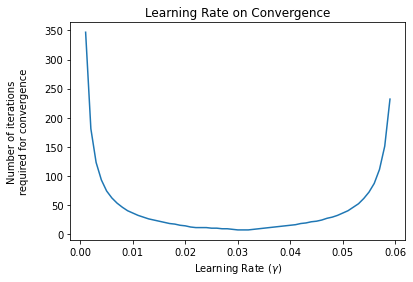

In [10]:
plt.title("Learning Rate on Convergence")
plt.xlabel("Learning Rate ($\gamma$)")
plt.ylabel("Number of iterations\n" "required for convergence\n")
plt.plot(
    [result["gamma"] for result in results],
    [result["n_iter"] for result in results],
)
plt.show()

### Part 4

In [11]:
def newton_raphson_minimization(
    df, d2f, x0, max_iter=1000, tol=10 ** -6, exact_iter=None
):
    """
    Performs Newton-Raphson minimization for a real-valued function of one variable.
    Returns the minimizer, the number of iterations and the optimization path
    as dictionary with keys 'argmin', 'n_iter' and 'path'.
    
    
    Arguments:
    -----------
    df (function): The derivative of the objective function, a real-valued function of one variable
    d2f (function): The second derivative of the objective function
    gamma (float): The learning rate
    x0 (float): The initial guess
    max_iter (int): The maximum number of iterations
    tol = 10**-6: The tolerance. The simulation stops when |x_{n} - x_{n-1}| <= tol and returns xn
    exact_iter (int): The exact number of iterations for the algorithm to run for
    """

    n_iter = 0
    x_last = np.inf
    x_current = x0
    x_path = [x0]

    while (
        abs(x_current - x_last) > tol
        if not exact_iter
        else n_iter < exact_iter
    ):

        x_current, x_last = (
            x_current - df(x_current) / d2f(x_current),
            x_current,
        )

        x_path.append(x_current)

        n_iter += 1

        if n_iter >= max_iter:
            warnings.warn(
                "Algorithm did not converge within the tolerance of {tol} in {max_iter} iterations."
            )
            break

    return {"argmin": x_current, "n_iter": n_iter, "path": x_path}

In [12]:
def d2_pi(q):
    """Second devivative of profit."""
    return -6 * q

Profit is convex, so to maximize it, we must minimize the negitive of its derivative.

In [13]:
newton_raphson_minimization(
    df=lambda q: -d_pi(q), d2f=lambda q: -d2_pi(q), x0=10, exact_iter=10
)

{'argmin': 5.477225575051661,
 'n_iter': 10,
 'path': [10,
  6.5,
  5.5576923076923075,
  5.477808091562417,
  5.477225606024404,
  5.477225575051661,
  5.477225575051661,
  5.477225575051661,
  5.477225575051661,
  5.477225575051661,
  5.477225575051661]}

### Part 5

You'll notice that Newton-Raphson almost always outperforms Gradient Descent regardless of the learning rate or initial guess. For example, try setting the initial guess to 100. For some learning rates, you may get an overflow error when computing $x_{n+1}$, this is because the learning rate is too large and makes the expression explode. Alternatively, if it runs, you may find that Gradient Descent does not converge within a reasonable number of iterations.

One issue you may have with Newton-Raphson is a `ZeroDivisionError` error. This will occur because at 0, $\pi''(0)=0$ and the iterative equation require division by $\pi''(0)$ in this problem. You can solve this issue by perturbing the iterative equation slightly:
$$x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})+\epsilon}$$
where $\epsilon$ is a very small number. When coding this, epsilon should be able to be defined by the user.

### Part 6

In [14]:
results = minimize(fun=lambda x: -pi(x), x0=5)
print(
    f"The maximum profit is {-results.fun} where the quantity is {results.x[0]}."
)
print(
    f"Scipy's mimimizer with its implementation of the BFGS solver took {results.nit} iterations."
)

The maximum profit is 328.63353450309955 where the quantity is 5.477225490171372.
Scipy's mimimizer with its implementation of the BFGS solver took 3 iterations.
